# Тюнинг линейной регрессии и ошибки

### О задании

В этом задании вы:
- обучите линейную регрессию, познакомитесь с метриками качества в задачах регресии

In [1]:
%pylab inline
import pandas as pd

from sklearn.base import BaseEstimator
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


## Часть 1. Линейная регрессия

Для начала загрузим данные и разделим их на обучающую и тестовую выборки в соотношении 7 к 3. Зачем так делать? Когда вы проверяете себя на данных на которых не обучались, вы можете быть уверены что не переобучились. Таким образом если качество на 70% датасета (оубчающей выборке) растёт, а на тестовой выборке падает, то модель начала запоминать датасет (переобучилась), вы что-то делаете не так.


In [91]:
data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.7, random_state=241)

__Задание 1.__ Обучение линейной регрессии.

**(4 балла)**

Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$).

Спойлер - при большом гиперпараметре регуляризации все параметры стремятся к нулю. На графике это должно быть видно.

In [81]:
from sklearn import datasets, linear_model
from sklearn.linear_model import Ridge, Lasso
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

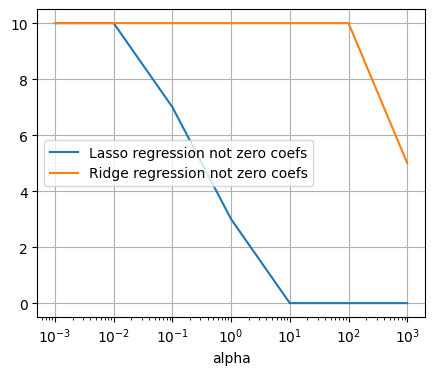

In [92]:
reg1 = Lasso()
reg2 = Ridge()
reg1.fit(X_train, y_train)
reg2.fit(X_train, y_train)
# print(reg1.coef_, reg2.coef_, sep='\n')
alpha_st, lr,rr = [],[],[]
for st in range(-3, 4):
  reg1 = Lasso(alpha=10**st)
  reg2 = Ridge(alpha=10**st)
  reg1.fit(X_train, y_train)
  reg2.fit(X_train, y_train)
  alpha_st.append(10**st)
  lr.append(((reg1.coef_ > 0.5)|(reg1.coef_ < -0.5)).sum())
  rr.append(((reg2.coef_ > 0.5)|(reg2.coef_ < -0.5)).sum())

plt.figure(figsize=[5,4])
plt.plot(alpha_st, lr, label="Lasso regression not zero coefs")
plt.plot(alpha_st, rr, label="Ridge regression not zero coefs")
plt.legend()
plt.grid()
plt.xlabel("alpha")
plt.xscale("log")
plt.show()

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [83]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

In [93]:
reg = Ridge()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_pred)))
print(mean_absolute_error(y_train, y_pred))
print(r2_score(y_train, y_pred))

58.32713753879843
48.415547518370865
0.45095857829505925


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

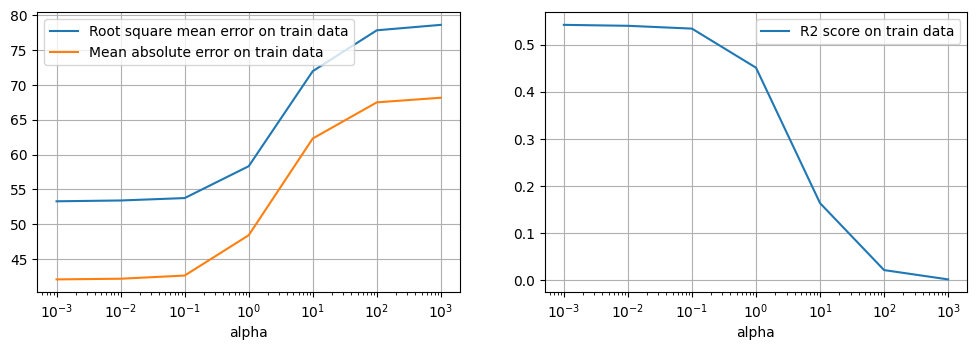

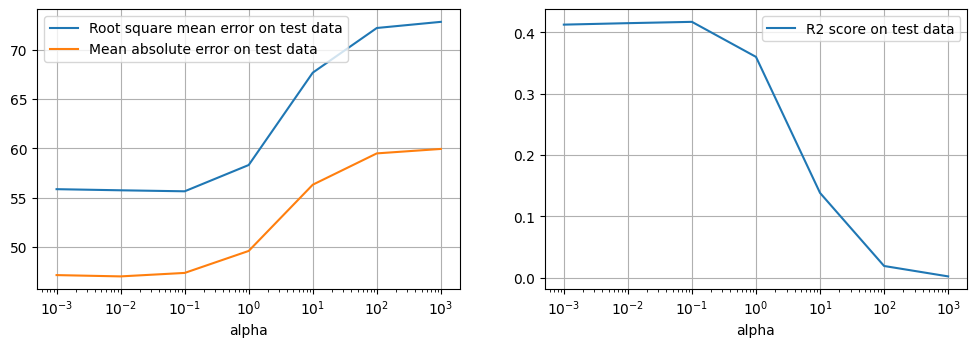

In [94]:

alpha_st, tr_rmse, tr_mae, tr_r2, test_rmse, test_mae, test_r2 = [], [], [], [], [], [], []
for st in range(-3, 4):
  reg = Ridge(alpha=10**st)
  reg.fit(X_train, y_train)
  alpha_st.append(10**st)
  y_pred = reg.predict(X_train)
  tr_rmse.append(sqrt(mean_squared_error(y_train, y_pred)))
  tr_mae.append(mean_absolute_error(y_train, y_pred))
  tr_r2.append(r2_score(y_train, y_pred))
  y_pred = reg.predict(X_test)
  test_rmse.append(sqrt(mean_squared_error(y_test, y_pred)))
  test_mae.append(mean_absolute_error(y_test, y_pred))
  test_r2.append(r2_score(y_test, y_pred))

for i in range(2):
  plt.figure(figsize=[12,8])
  plt.subplot(2,2,1+i*2)
  plt.plot(alpha_st, tr_rmse if i==0 else test_rmse, label="Root square mean error on "+ ("train" if i==0 else "test") + " data")
  plt.plot(alpha_st, tr_mae if i==0 else test_mae, label="Mean absolute error on "+ ("train" if i==0 else "test") + " data")
  plt.legend()
  plt.grid()
  plt.xlabel("alpha")
  plt.xscale("log")
  plt.subplot(2,2,2+2*i)
  plt.plot(alpha_st, tr_r2 if i==0 else test_r2, label="R2 score on "+ ("train" if i==0 else "test") + " data")
  plt.legend()
  plt.grid()
  plt.xlabel("alpha")
  plt.xscale("log")
  plt.show()

__Задание 2.__ Поиск объектов-выбросов

**(4 балла)**
Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

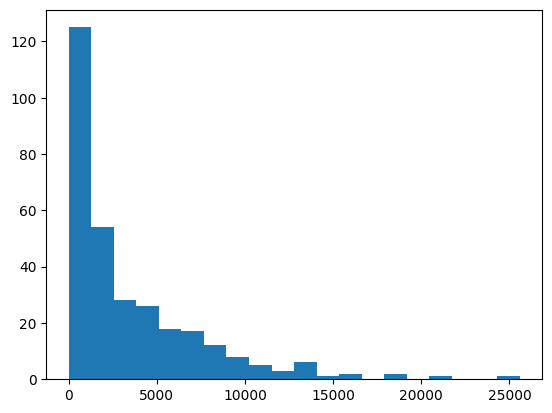

In [95]:
reg = Ridge()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_train)

plt.hist((y_pred-y_train)**2,bins=20);

Попробуйте удалить объекты-выбросы из обучающей выборки (что считать или не считать выбросами на ваше усмотрение). Обучите модель заново и посмотрите на качество на отложенной выборке (учитывайте, что там тоже могут быть выбросы, с которыми вы ничего не можете сделать). Стало ли лучше? Чем вы можете объяснить это?

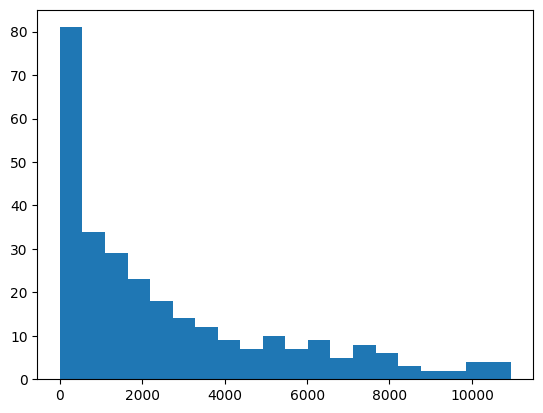

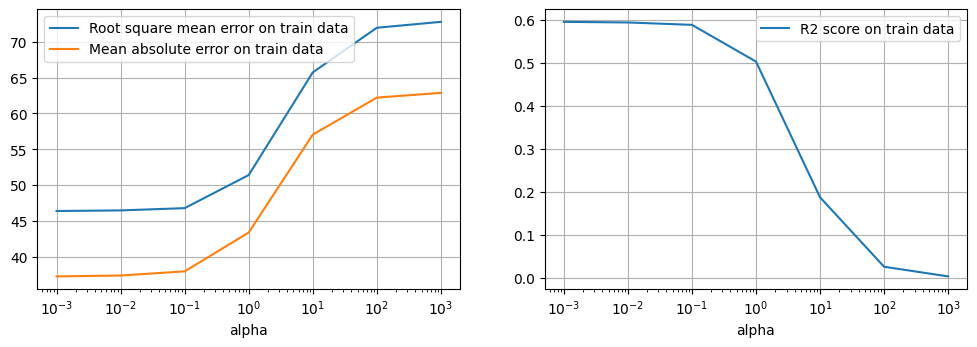

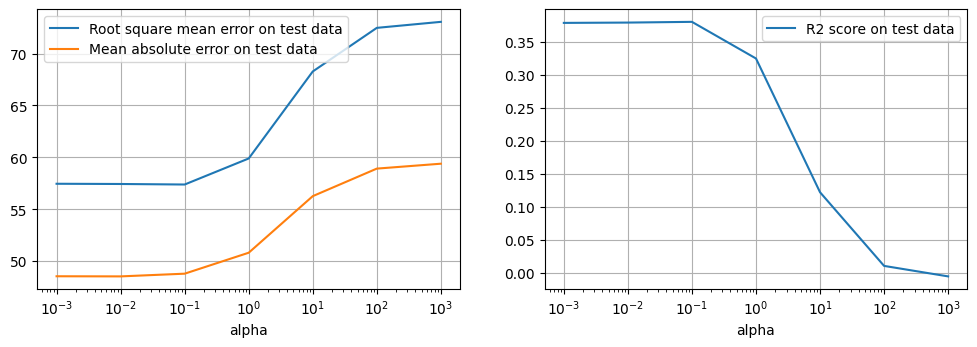

In [96]:
reg = Ridge()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_train)
ok_inds = ((y_pred-y_train)**2)<10000
X_train, y_train = X_train[ok_inds], y_train[ok_inds]
reg.fit(X_train, y_train)
y_pred = reg.predict(X_train)
plt.hist((y_pred-y_train)**2,bins=20)

alpha_st, tr_rmse, tr_mae, tr_r2, test_rmse, test_mae, test_r2 = [], [], [], [], [], [], []
for st in range(-3, 4):
  reg = Ridge(alpha=10**st)
  reg.fit(X_train, y_train)
  alpha_st.append(10**st)
  y_pred = reg.predict(X_train)
  tr_rmse.append(sqrt(mean_squared_error(y_train, y_pred)))
  tr_mae.append(mean_absolute_error(y_train, y_pred))
  tr_r2.append(r2_score(y_train, y_pred))
  y_pred = reg.predict(X_test)
  test_rmse.append(sqrt(mean_squared_error(y_test, y_pred)))
  test_mae.append(mean_absolute_error(y_test, y_pred))
  test_r2.append(r2_score(y_test, y_pred))

for i in range(2):
  plt.figure(figsize=[12,8])
  plt.subplot(2,2,1+i*2)
  plt.plot(alpha_st, tr_rmse if i==0 else test_rmse, label="Root square mean error on "+ ("train" if i==0 else "test") + " data")
  plt.plot(alpha_st, tr_mae if i==0 else test_mae, label="Mean absolute error on "+ ("train" if i==0 else "test") + " data")
  plt.legend()
  plt.grid()
  plt.xlabel("alpha")
  plt.xscale("log")
  plt.subplot(2,2,2+2*i)
  plt.plot(alpha_st, tr_r2 if i==0 else test_r2, label="R2 score on "+ ("train" if i==0 else "test") + " data")
  plt.legend()
  plt.grid()
  plt.xlabel("alpha")
  plt.xscale("log")
  plt.show()

Да, лучше стало. Минимальное значение RMSE понизилось с 47 до 37 на основной выборке. Однако на тестовой выборке результат почти не изменился. Потому что выбросы сильно влияют на RMSE.

__Задание 3.__ Отчёт

**(2 балла)**



1.   Я понял, что чем меньше alpha, тем лучше
2.   Лучше иметь поменьше нулевых коэффициентов регрессии
3.   Надо очщиать данные
4.   Графички прикольные

